In [1]:
import pyarrow as pa
import pyarrow.parquet as pq
import numpy as np
import os
import pandas as pd
import time

pa.set_cpu_count(8)

def get_timing(f, niter):
    start = time.clock_gettime(time.CLOCK_REALTIME)
    for i in range(niter):
        f()
    result = (time.clock_gettime(time.CLOCK_REALTIME) - start) / niter
    return result

In [2]:
total_num_values = 100_000_000

In [4]:
def make_example_table(num_cols):
    num_rows = total_num_values // num_cols
    
    values = np.arange(num_rows)
    
    return pa.table([values] * num_cols, 
                    names=['f{}'.format(i) for i in range(num_cols)])
    

In [5]:
t1 = make_example_table(100)
t2 = make_example_table(100000)

In [6]:
import pyarrow.feather as fth

In [17]:
fth.write_feather(t1, 't1.arrow', compression=None)
fth.write_feather(t2, 't2.arrow', compression=None)

In [18]:
!ls -l

total 2519376
-rw------- 1 wesm wesm 800088522 May  9 16:44 t1.arrow
-rw------- 1 wesm wesm 815199522 May  9 16:44 t2.arrow
-rw------- 1 wesm wesm 964513790 May  9 16:23 test.parquet
-rw------- 1 wesm wesm     17815 May  9 16:42 WideParquet.ipynb


In [15]:
%timeit fth.read_table('t1.arrow')

118 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
%timeit fth.read_table('t2.arrow')

398 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
fth.write_feather?

In [27]:
num_cols_cases = [10, 100, 1000, 10000, 100000]

file_path = 'test.parquet'

file_sizes = {}
read_times = {}

for num_cols in num_cols_cases:
    print(num_cols)

    table = make_example_table(num_cols)
    
    pq.write_table(table, file_path, compression='NONE')
    
    file_sizes[num_cols] = os.stat(file_path).st_size
    read_times[num_cols] = get_timing(lambda: pq.read_table(file_path), 10)

10
100
1000
10000
100000


In [28]:
file_sizes

{10: 802850724,
 100: 827973796,
 1000: 1013094899,
 10000: 979191400,
 100000: 964513790}

In [29]:
read_times

{10: 0.10510084629058838,
 100: 0.07333686351776122,
 1000: 0.12494065761566162,
 10000: 0.5032524585723877,
 100000: 3.8229554891586304}

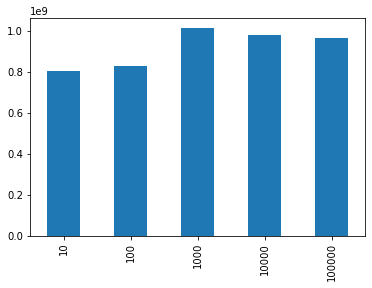

In [30]:
pd.Series(file_sizes).plot.bar()

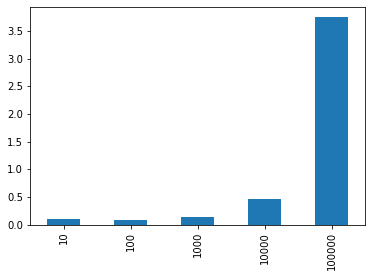

In [21]:
pd.Series(read_times).plot.bar()